In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

## Loading the Dataset

In [8]:
# Creating the database connection
conn = sqlite3.connect('vendor.db')

#fetching vendor summary data
df = pd.read_sql("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,freightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


## Exploratory Data Analysis

1. Previously, we examined the various tables present in the database to identify key variables, understand their relationships, and determine which ones are to be included in the final analysis.

2. In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help understand data patterns, identify anomalies, and ensure data quality before proceeding to further data analysis.

In [16]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


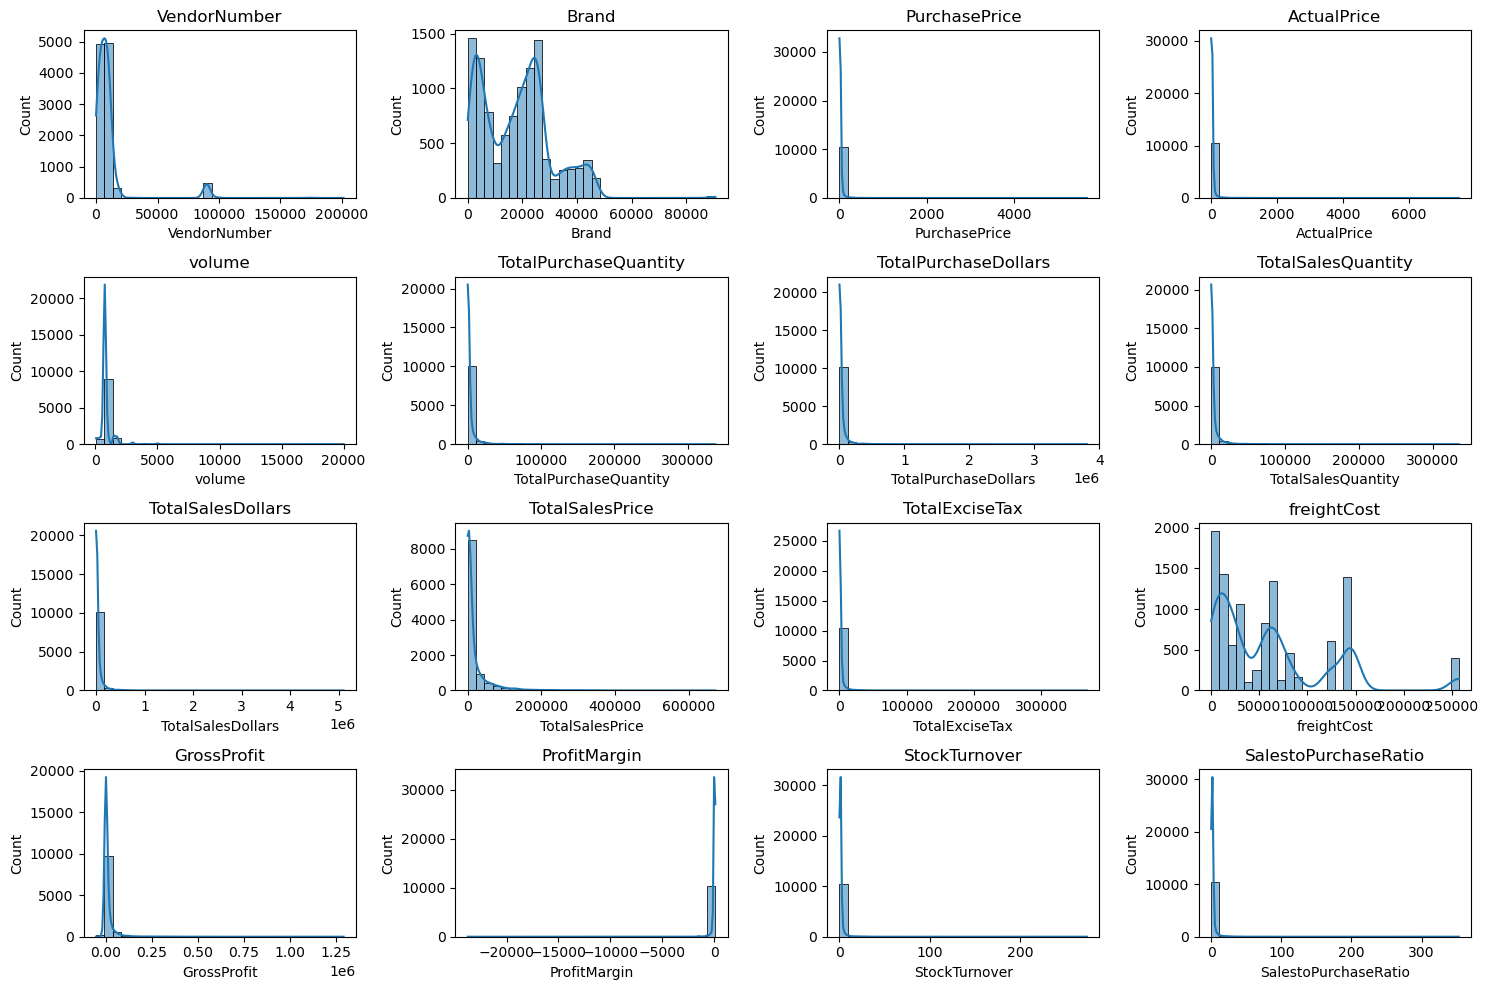

In [18]:
# Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

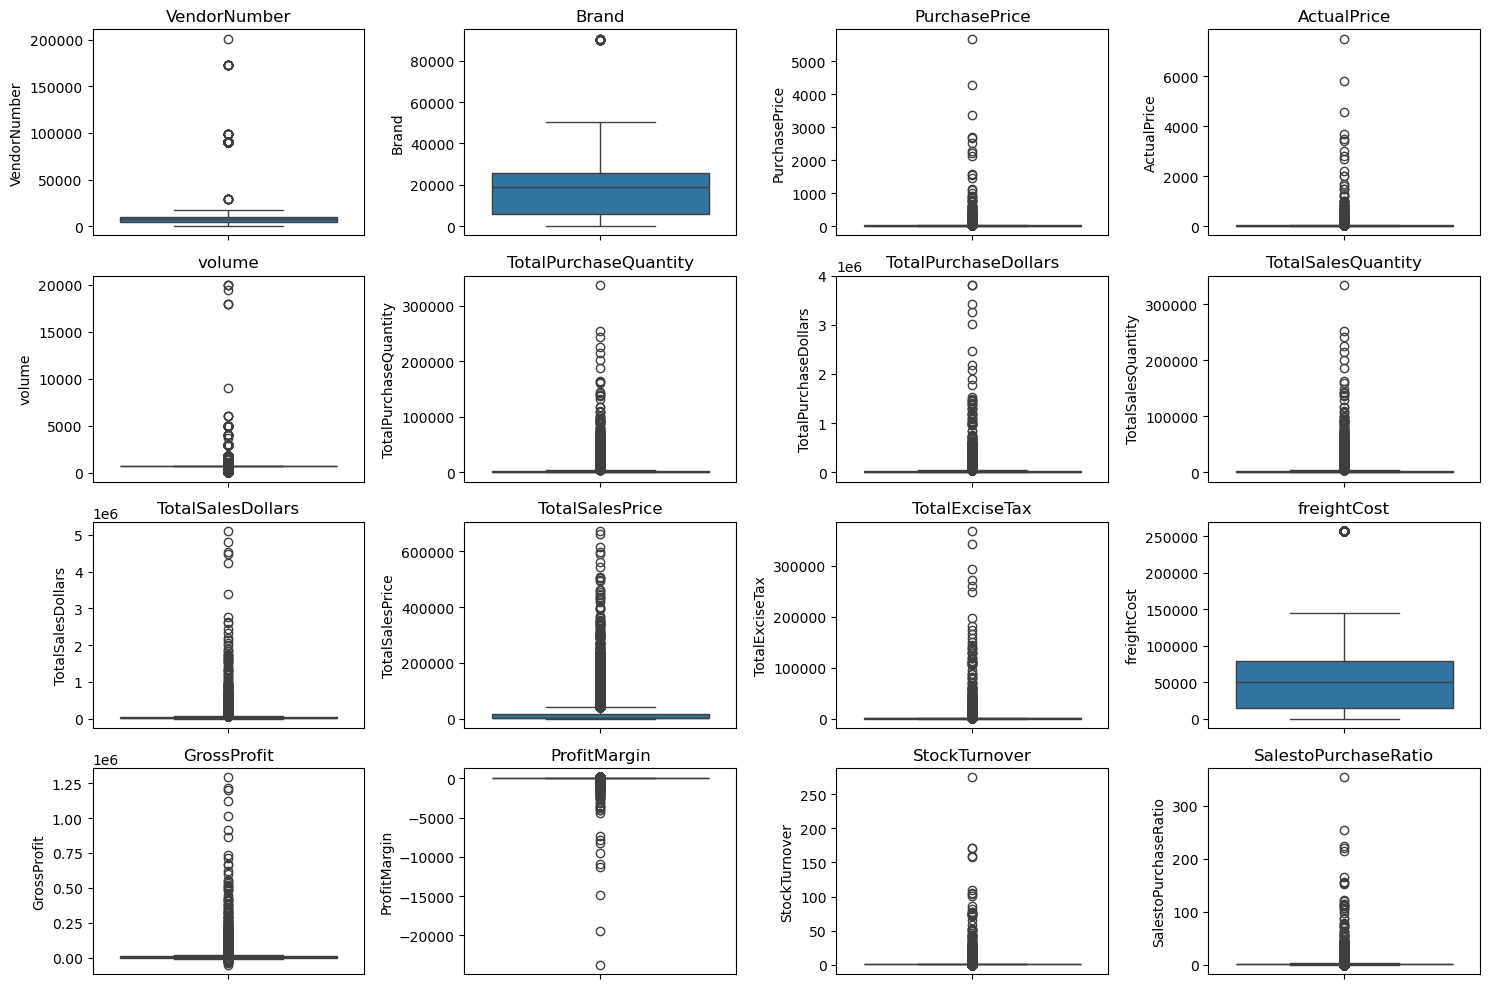

In [22]:
#Outlier detection using boxplot
plt.figure(figsize = (15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary Statistics Insights:

##### Negative & Zero Values
1. GrossProfit: Minimum value is -52.002.78 which indicates loss. Some products or transactions may be selling at a
loss due to high costs or selling at a discounted rate which is lower than the purchase price.
2. ProfitMargin: Has a minimum of -infinity which suggests instances where revenue is zero or even lower than the costs.
3. TotalSalesQuantity & Sales Dollars: Minimum value is 0 which means some products were purchased but never sold. These could be slow-moving or non-selling stock.

##### Outliers Indicated by High Standard Deviations
1. Purchase & Actual Prices: The max values (5681.81 & 7499.99) are significantly higher than the mean (24.39 & 35.64), indicating few potential premium products.
2. Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
3. Stock Turnover: Ranges from 0 to 274. Imply that some products are selling extremely fast while other remains in the stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fullfiled from the older stock.



In [28]:
#lets filter out the data where Gross profit, total purchase quantity and profit margin should not be less than 0
df = pd. read_sql("""SELECT * 
FROM vendor_sales_summary 
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)

In [30]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,freightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


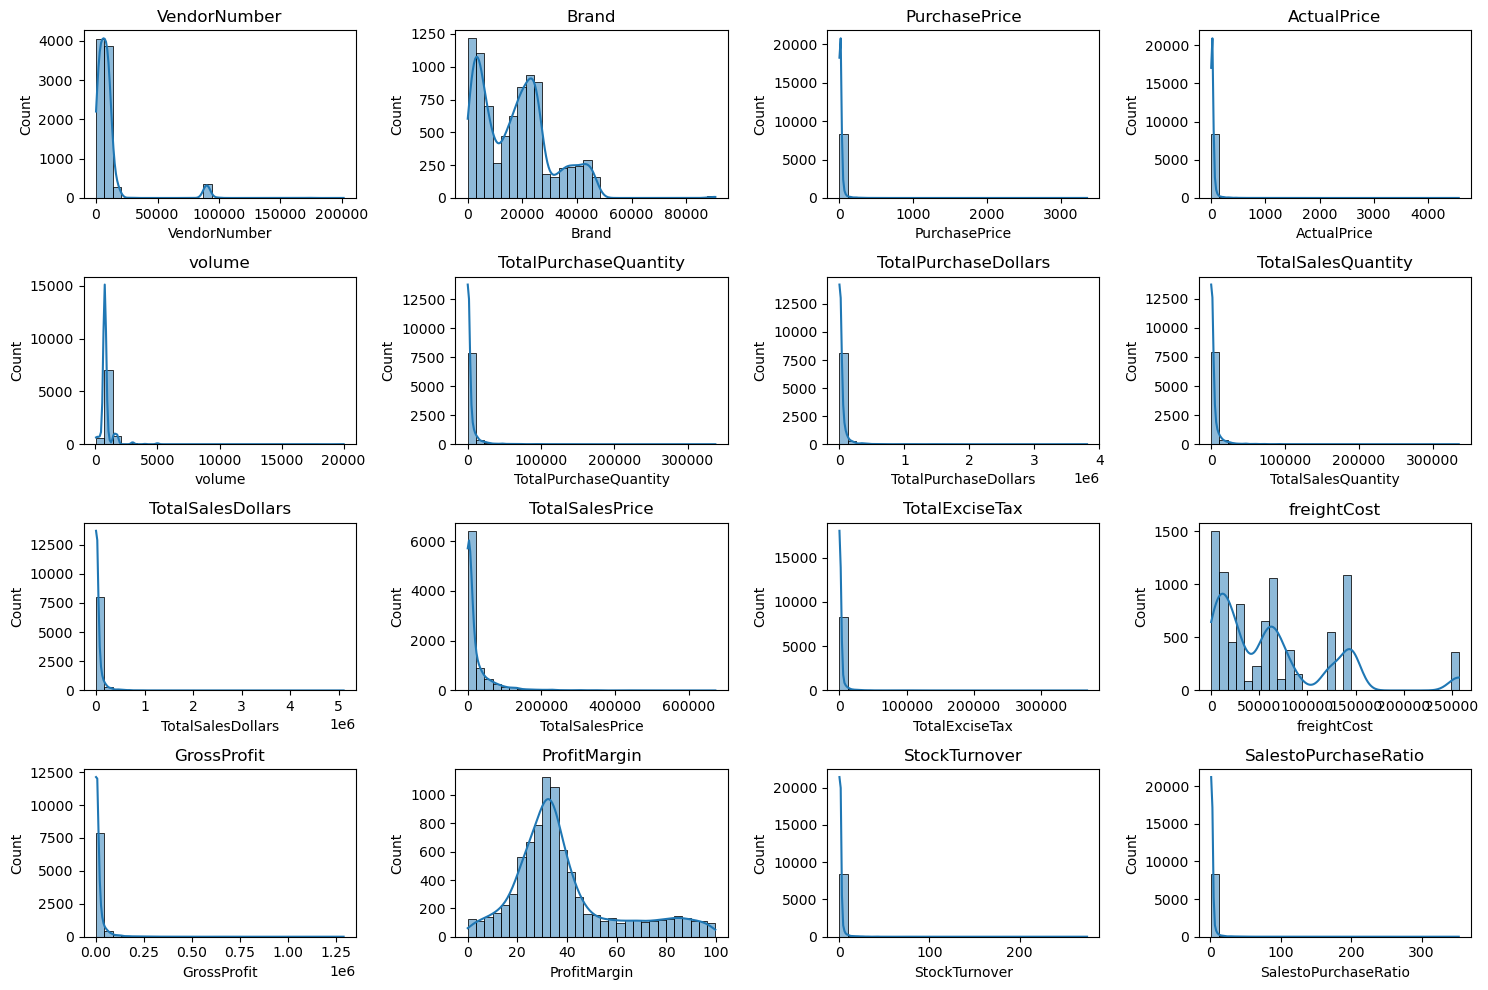

In [32]:
# Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

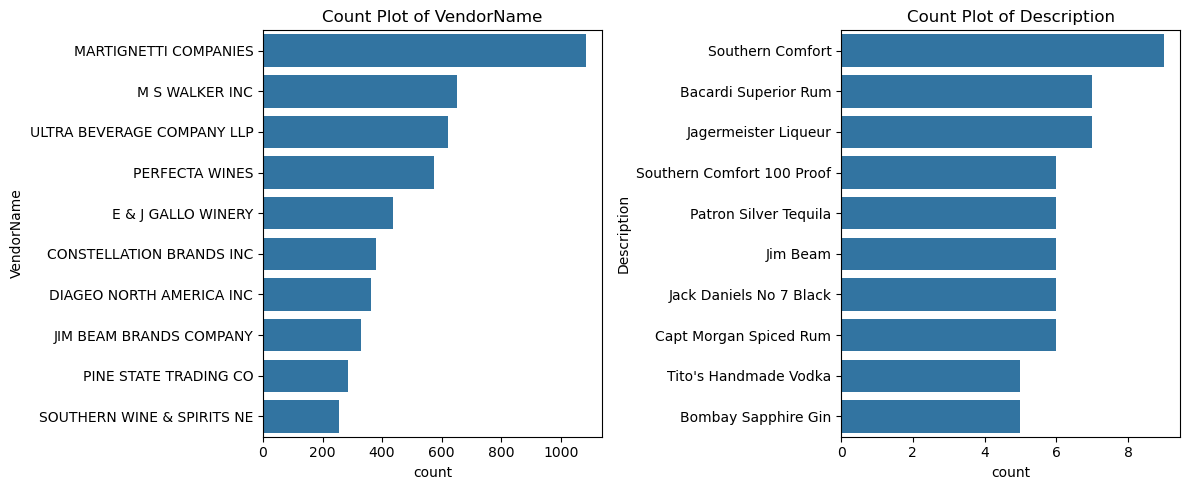

In [34]:
# Count Plots for Categorical Columns
categorical_cols =  ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 Categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

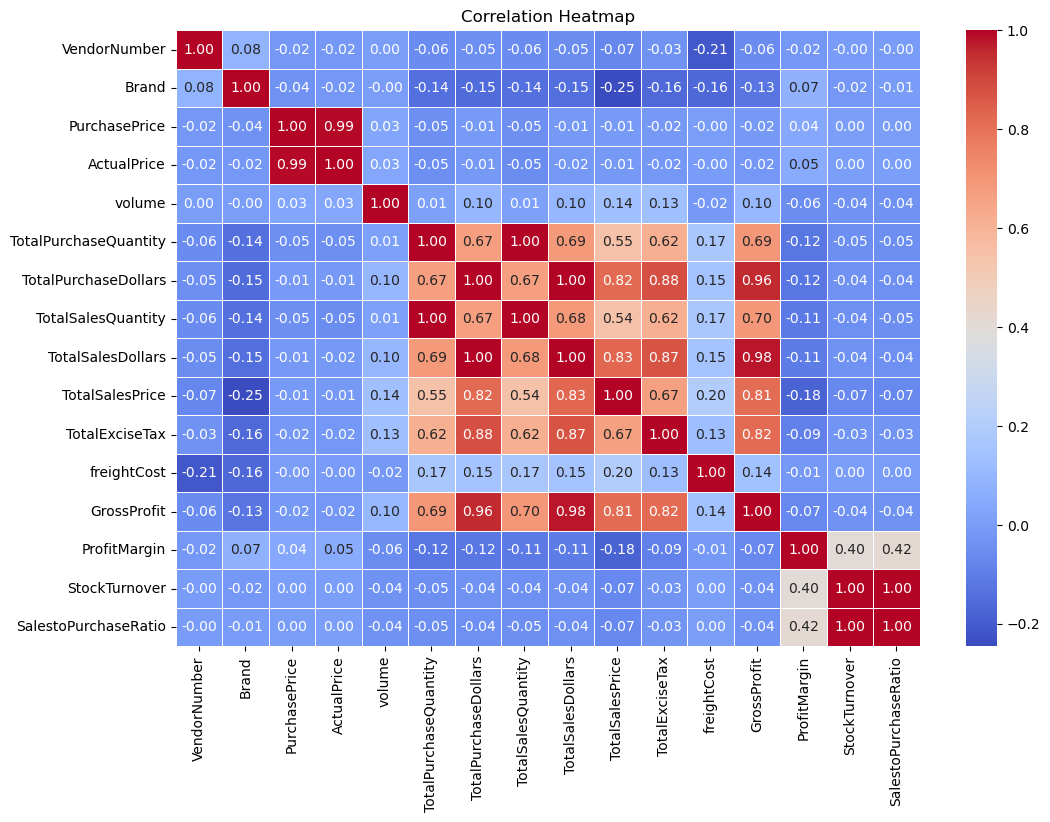

In [38]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights
1. PurchasePrice has a weak correlation with TotalSalesDollars(-0.010) and GrossProfit(-0.020), suggesting that price variations do not significantly impact sales revenue or profit.
2. Strong correlation between total purchase quantity and total sales quantity(0.999), confirming efficient inventory turnover
3. Negative Correlation between profit margin & total sales price(-0.18) suggests that as sales price increases, margin decreases, possibly due to competitive pricing pressure
4. StockTurnover has a negative weak correlation with both GrossProfit(-0.04) and ProfitMargin(-0.055), indicating that faster turnover does not necessarily result in higher profitability.

## Data Interpretation

#### 1. Identify the brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margins.

In [43]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum',
    'ProfitMargin' : 'mean'}).reset_index()

In [45]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [47]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_profit_threshold = brand_performance['ProfitMargin'].quantile(0.80)

In [49]:
low_sales_threshold

560.299

In [81]:
high_profit_threshold

53.569222709109354

In [87]:
#Filtering out the brands with low sales and high profit margin
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_profit_threshold)
]
print("Brands with low sales but high profit margin:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
6245,Sbragia Home Ranch Merlot,549.75,66.444748
6484,Smirnoff Fluffed Marshmallow,554.63,61.392280
7433,Vino.e Falanghina Beneventno,558.57,63.352847
3326,Goulee Cos d'Estournel 10,558.87,69.434752


In [55]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # For better visualization

In [344]:
brand_performance.to_csv('brand_performance.csv')

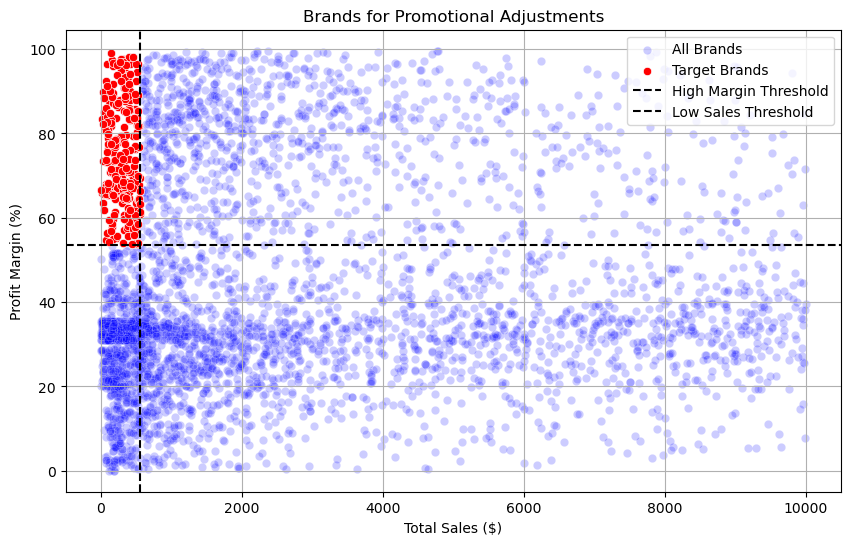

In [149]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_profit_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")



plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional Adjustments")
plt.legend()
plt.grid(True)
plt.show()

#### 2. Which vendors and brands demonstrate the highest sales performance?


In [326]:
top_vendors_sales = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands_sales = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [328]:
top_vendors_sales

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [330]:
top_brands_sales

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [332]:
 #Lets make the values more readable to understand the values and give them a metric
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [334]:
top_brands_sales.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [336]:
top_vendors_sales.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

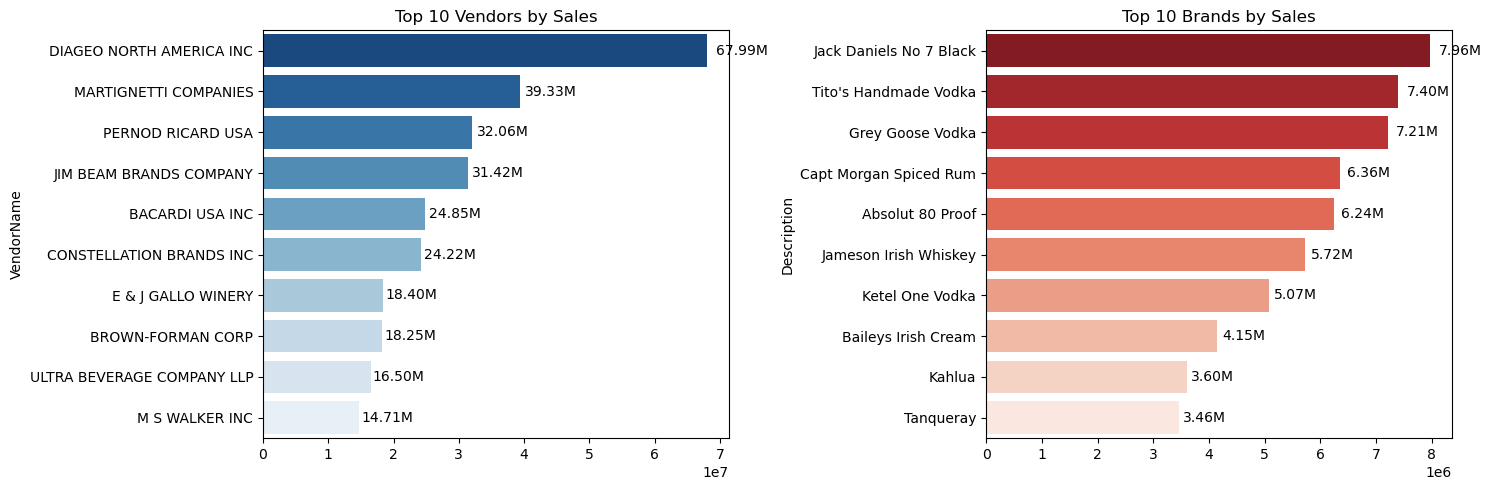

In [340]:
# Plotting for top vendors
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors_sales.index, x=top_vendors_sales.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + bar.get_width() * 0.02,
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha="left", va="center", fontsize=10, color="black"
    )

# Plotting for top brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands_sales.index, x=top_brands_sales.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + bar.get_width() * 0.02,
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha="left", va="center", fontsize=10, color="black"
    )

plt.tight_layout()
plt.show()


#### 3. Which vendors contribute the most to total purchase dollars?

In [155]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalSalesDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalPurchaseDollars': 'sum'
}).reset_index()

In [157]:
vendor_performance

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars
0,ADAMBA IMPORTS INTL INC,704.53,258.37,446.16
1,ALISA CARR BEVERAGES,104470.94,78772.82,25698.12
2,ALTAMAR BRANDS LLC,15706.81,4000.61,11706.20
3,AMERICAN SPIRITS EXCHANGE,1511.16,577.08,934.08
4,AMERICAN VINTAGE BEVERAGE,139603.53,35167.85,104435.68
...,...,...,...,...
114,WEIN BAUER INC,56217.13,13522.49,42694.64
115,WESTERN SPIRITS BEVERAGE CO,405254.83,106837.97,298416.86
116,WILLIAM GRANT & SONS INC,7569876.20,1693337.94,5876538.26
117,WINE GROUP INC,8304043.28,3100242.11,5203801.17


In [184]:
vendor_performance["PurchaseContribution%"] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum() * 100

In [186]:
vendor_performance

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,67990099.42,17892873.26,50097226.16,16.300345
57,MARTIGNETTI COMPANIES,39330359.36,13828263.53,25502095.83,8.297724
68,PERNOD RICARD USA,32063196.19,8212032.02,23851164.17,7.760554
46,JIM BEAM BRANDS COMPANY,31423020.46,7928716.14,23494304.32,7.644441
6,BACARDI USA INC,24854817.14,7422796.88,17432020.26,5.671930
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,327.59,198.95,128.64,0.000042
107,UNCORKED,176.94,58.20,118.74,0.000039
85,SILVER MOUNTAIN CIDERS,342.51,265.33,77.18,0.000025
16,CAPSTONE INTERNATIONAL,246.87,192.23,54.64,0.000018


In [188]:
vendor_performance=round(vendor_performance.sort_values("PurchaseContribution%", ascending=False),2)

In [304]:
#Display Top 10 Vendors
top_vendors_contri = vendor_performance.head(10)
top_vendors_contri['TotalSalesDollars'] = top_vendors_contri['TotalSalesDollars'].apply(format_dollars)
top_vendors_contri['TotalPurchaseDollars']=top_vendors_contri['TotalPurchaseDollars'].apply(format_dollars)
top_vendors_contri['GrossProfit']=top_vendors_contri["GrossProfit"].apply(format_dollars)
                                                                    

In [306]:
top_vendors_contri

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,67.99M,17.89M,50.10M,16.30
57,MARTIGNETTI COMPANIES,39.33M,13.83M,25.50M,8.30
68,PERNOD RICARD USA,32.06M,8.21M,23.85M,7.76
46,JIM BEAM BRANDS COMPANY,31.42M,7.93M,23.49M,7.64
6,BACARDI USA INC,24.85M,7.42M,17.43M,5.67
20,CONSTELLATION BRANDS INC,24.22M,8.95M,15.27M,4.97
11,BROWN-FORMAN CORP,18.25M,5.01M,13.24M,4.31
30,E & J GALLO WINERY,18.40M,6.33M,12.07M,3.93
106,ULTRA BEVERAGE COMPANY LLP,16.50M,5.34M,11.17M,3.63
53,M S WALKER INC,14.71M,4.94M,9.76M,3.18


In [308]:
top_vendors_contri['PurchaseContribution%'].sum()

65.69000000000001

##### Top10 Vendors are contributing 66% of the total PurchaseDollars Products.

In [310]:
top_vendors_contri['CumulativeContribution%'] = top_vendors_contri['PurchaseContribution%'].cumsum()

In [312]:
top_vendors_contri

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution%,CumulativeContribution%
25,DIAGEO NORTH AMERICA INC,67.99M,17.89M,50.10M,16.30,16.30
57,MARTIGNETTI COMPANIES,39.33M,13.83M,25.50M,8.30,24.60
68,PERNOD RICARD USA,32.06M,8.21M,23.85M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,31.42M,7.93M,23.49M,7.64,40.00
6,BACARDI USA INC,24.85M,7.42M,17.43M,5.67,45.67
20,CONSTELLATION BRANDS INC,24.22M,8.95M,15.27M,4.97,50.64
11,BROWN-FORMAN CORP,18.25M,5.01M,13.24M,4.31,54.95
30,E & J GALLO WINERY,18.40M,6.33M,12.07M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,16.50M,5.34M,11.17M,3.63,62.51
53,M S WALKER INC,14.71M,4.94M,9.76M,3.18,65.69


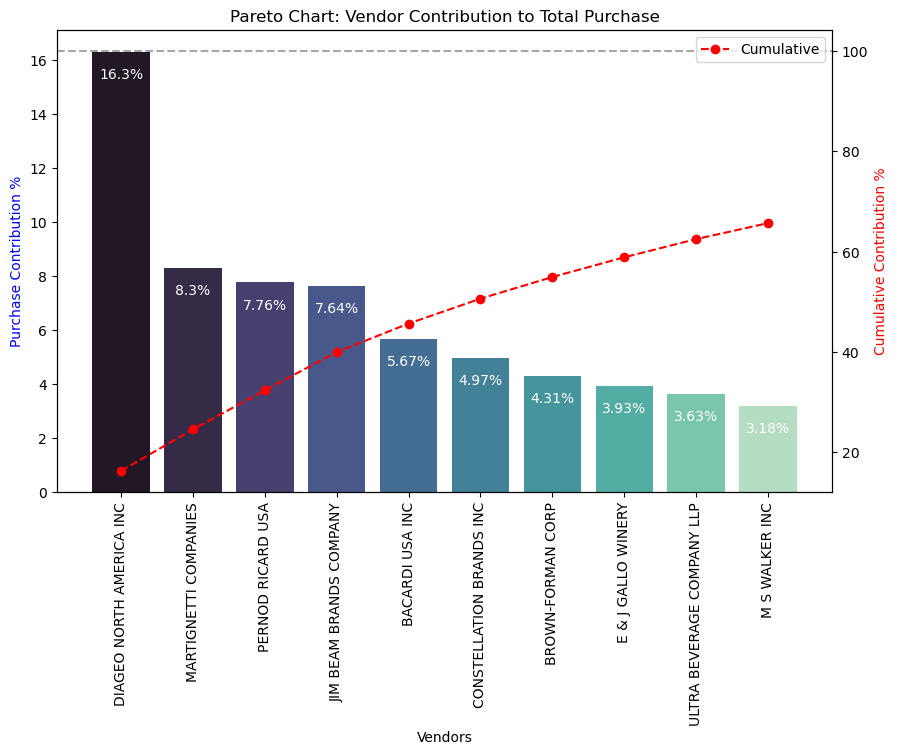

In [316]:
fig, ax1 = plt.subplots(figsize=(10,6))

#Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors_contri['VendorName'], y=top_vendors_contri['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors_contri['PurchaseContribution%']):
    ax1.text(i, value-1, str(value)+'%', ha="center", fontsize=10, color='white')

#Line Plot for Cumulative Contribution
ax2=ax1.twinx()
ax2.plot(top_vendors_contri['VendorName'], top_vendors_contri['CumulativeContribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors_contri['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchase')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

#### 4. How much of the Total Procurement is dependent on the top vendors?

In [318]:
print(f"Total Purchase Contribution of Top 10 Vendors is {round(top_vendors_contri['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of Top 10 Vendors is 65.69%


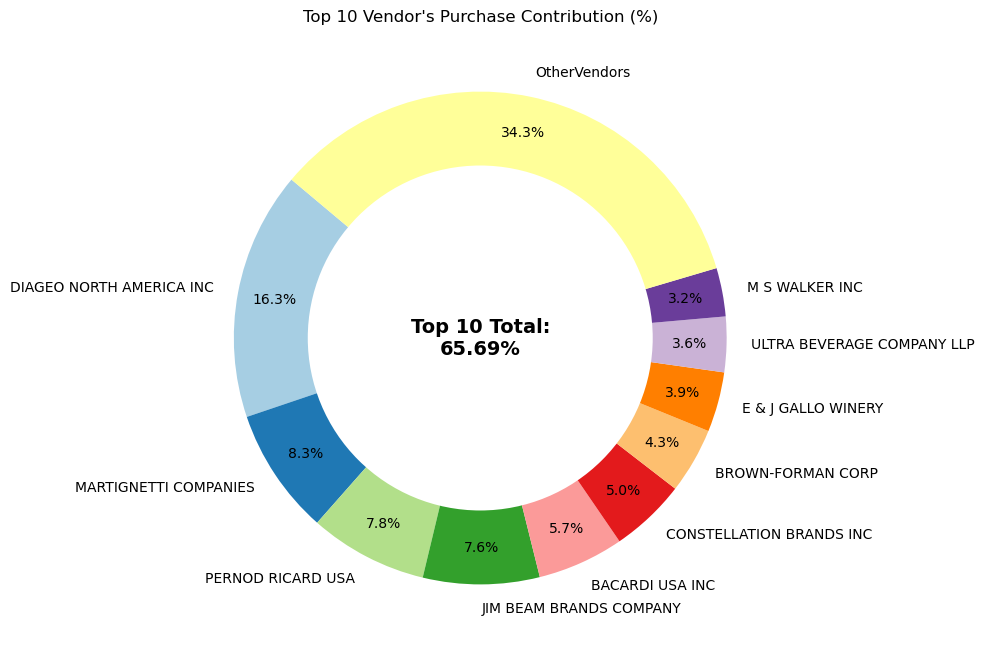

In [320]:
vendors = list(top_vendors_contri['VendorName'].values)
purchase_contribution = list(top_vendors_contri['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

#Append "OtherVendors" Category
vendors.append("OtherVendors")
purchase_contribution.append(remaining_contribution)

#Donus Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contribution, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a White circle in the centre to center a "donut" effect
centre_circle = plt.Circle((0,0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)

#Add Total Contribution annotation in the center
plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)" )
plt.show()

In [324]:
top_vendors_contri.to_csv("Purchase_Contribution.csv", index=False)

#### 5. Does Purchasing in Bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [223]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [225]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,freightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [227]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small","Medium","Large"])

In [229]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,freightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small


In [231]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


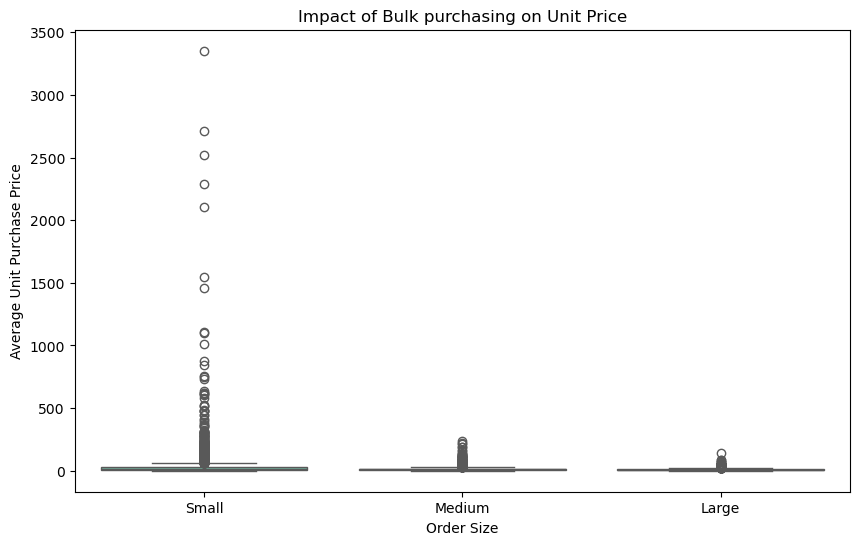

In [233]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

1) Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
2) The price difference between small and Large order is substantial(~72% reduction in unit cost)
3) This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

#### 6) Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [239]:
df[df['StockTurnover']<1]

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,freightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8191,653,STATE WINE & SPIRITS,24371,Tozai Typhoon Sake,10.45,15.99,720.0,6,62.70,5.0,79.95,79.95,0.55,8014.98,17.25,21.575985,0.833333,1.275120,10.45,Small
8201,9552,M S WALKER INC,398,S S Pierce Ninety Nine Gin,5.63,7.49,1000.0,11,61.93,9.0,67.41,7.49,9.45,55551.82,5.48,8.129358,0.818182,1.088487,5.63,Small
8202,1392,CONSTELLATION BRANDS INC,16916,R Mondavi Malbec Private Slt,5.15,7.99,750.0,12,61.80,10.0,85.90,34.96,1.12,79528.99,24.10,28.055879,0.833333,1.389968,5.15,Small
8242,8352,LUXCO INC,8629,Ezra Brooks Cinnamon Bourbon,11.02,13.99,1750.0,5,55.10,3.0,56.97,37.98,5.51,10261.60,1.87,3.282429,0.600000,1.033938,11.02,Small


In [257]:
df.groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
TAMWORTH DISTILLING,0.797078
WALPOLE MTN VIEW WINERY,0.820548
SWEETWATER FARM,0.851047
BRONCO WINE COMPANY,0.866951
AMERICAN SPIRITS EXCHANGE,0.875000
SWEET BABY VINEYARD,0.876638
FULCHINO VINEYARD INC,0.879957
SOUTHERN GLAZERS W&S OF NE,0.883701
CENTEUR IMPORTS LLC,0.886976


#### 7) How much capital is locked in unsold inventory per vendor, and which vendor contribute the most to it?

In [245]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital: ', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital:  2.71M


In [255]:
#Aggregate Capital Locked Per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the highest locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


## Hypothesis Testing
#### 1) What is the 95% confidence Intervals for profit-margins of top-performing and low-performing vendors

In [260]:
top_performing = df["TotalSalesDollars"].quantile(0.75)
low_performing = df["TotalSalesDollars"].quantile(0.25)

In [262]:
top_vendors = df[df["TotalSalesDollars"] >= top_performing]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_performing]["ProfitMargin"].dropna()


In [264]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [280]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) #Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical + std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (28.99, 33.36), Mean: 31.18
Low Vendors 95% CI: (39.06, 44.07), Mean: 41.57


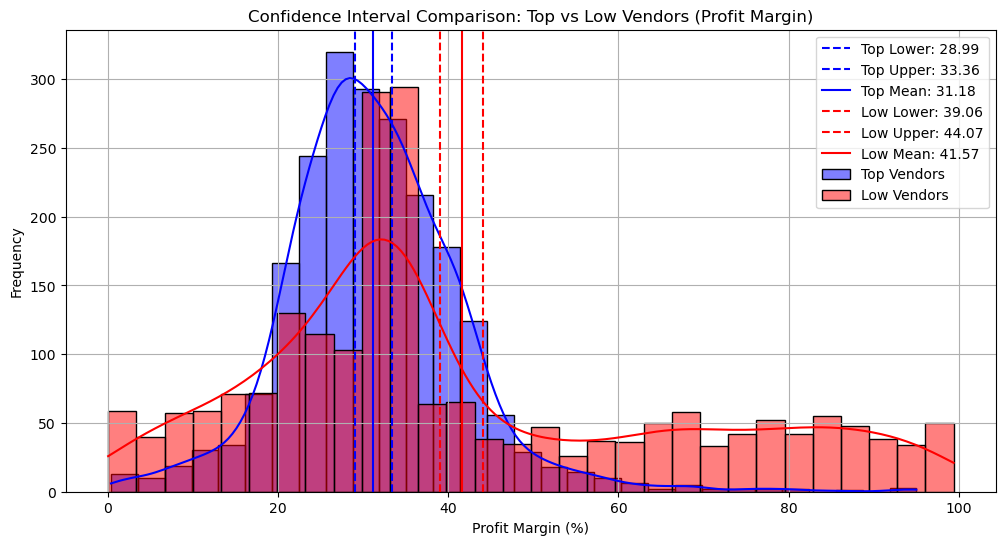

In [282]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

#Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

#Finalized Plot
plt.title("Confidence Interval Comparison: Top vs Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

1) The confidence interval for low-performing vendors (39.06% to 44.07%) is significantly higher than that of top-performing vendors (28.99% to 33.36%).
2) This suggests that vendors with low sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
3) **For High-Performing Vendors**: If they aim to improve profitability, they could explore selective price adjustments, cost optimizatins or bundling strategies
4) **For Low-Performing Vendors**: Despite Higher Margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

#### 8) Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

1) H0(Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

2) H1(Alternate Hypothesis): The mean profit of top-performing and low-performing vendors are significantly different.

In [292]:
top_performing = df["TotalSalesDollars"].quantile(0.75)
low_performing = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_performing]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_performing]["ProfitMargin"].dropna()

#Perform Two-Sample T-test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

#Print Results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Ho: There is a significant difference in profit margins between top and low performing vendors.")
else:
    print("Fail to Reject Ho: No Significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject Ho: There is a significant difference in profit margins between top and low performing vendors.


In [298]:
df.to_csv("vendor_sales_summary.csv", index=False)